C:\Users\veena\OneDrive\Desktop\project_1\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\veena\OneDrive\Desktop\project_1\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\veena\OneDrive\Desktop\project_1\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Enter strike rate to find its cluster in Powerplay phase:  110


The strike rate 110.0 in Powerplay phase belongs to Cluster 1


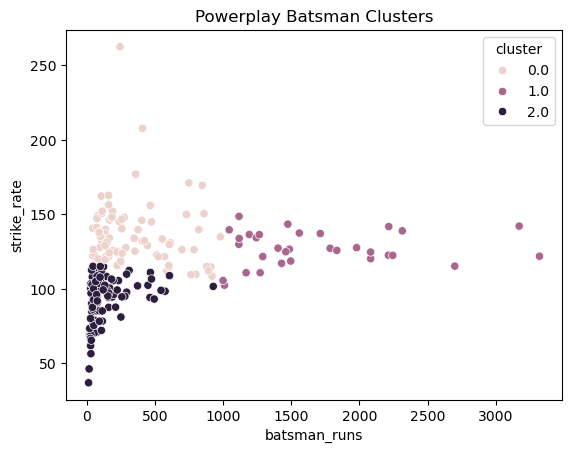

In [4]:
import pandas as pd


data = pd.read_csv(r"C:\Sakha Internship\archive\deliveries.csv")



def get_phase(over):
    if 1 <= over <= 6:
        return 'Powerplay'
    elif 7 <= over <= 13:
        return 'Middle'
    else:
        return 'Death'

data['phase'] = data['over'].apply(get_phase)

batsman_stats = data.groupby(['batter', 'phase']).agg({
    'batsman_runs': 'sum',
    'ball': 'count'
}).reset_index()

batsman_stats['strike_rate'] = batsman_stats['batsman_runs'] / batsman_stats['ball'] * 100

batsman_stats = batsman_stats[batsman_stats['ball'] >= 30]



from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


clusters = {}
for phase in ['Powerplay', 'Middle', 'Death']:
    phase_data = batsman_stats[batsman_stats['phase'] == phase][['batsman_runs', 'strike_rate']]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(phase_data)

    kmeans = KMeans(n_clusters=3, random_state=42)
    batsman_stats.loc[batsman_stats['phase'] == phase, 'cluster'] = kmeans.fit_predict(X_scaled)

user_strike_rate = float(input("Enter strike rate to find its cluster in Powerplay phase: "))
predicted_cluster = kmeans.predict(input_scaled)[0]
print(f"The strike rate {user_strike_rate} in Powerplay phase belongs to Cluster {predicted_cluster}")

import seaborn as sns
import matplotlib.pyplot as plt


phase_df = batsman_stats[batsman_stats['phase'] == 'Powerplay']
sns.scatterplot(data=phase_df, x='batsman_runs', y='strike_rate', hue='cluster')
plt.title("Powerplay Batsman Clusters")
plt.show()



